In [776]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's company.

sp500_history.csv: Contains historical closing prices of the S&P 500 Index.

#Whale Returns

Read the Whale Portfolio daily returns and clean the data

# Reading whale returns

In [777]:
csv_path = Path('whale_returns.csv')
whale_returns = pd.read_csv(csv_path)
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [778]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [779]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [780]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [781]:
whale_returns = whale_returns.sort_values(by=['Date'], ascending=False)
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
...,...,...,...,...,...
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [782]:
whale_returns['Date'] = whale_returns['Date'].astype("datetime64")

In [783]:
whale_returns.set_index('Date')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
...,...,...,...,...
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.004016,0.004076,0.002355,0.006726


# Reading algorithmic returns

In [784]:
csv_path = Path('algo_returns.csv')
algo_returns = pd.read_csv(csv_path)
algo_returns

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [785]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [786]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [787]:
# Count nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [788]:
algo_returns = algo_returns.sort_values(by=['Date'], ascending=False)
algo_returns

,Date,Algo 1,Algo 2
1240,2019-05-01,0.000094,-0.007358
1239,2019-04-30,-0.002944,-0.001570
1238,2019-04-29,0.005208,0.002829
1237,2019-04-26,0.002981,0.005256
1236,2019-04-25,0.000682,-0.007247
...,...,...,...
10,2014-06-11,0.004760,-0.003761
9,2014-06-10,0.004406,-0.000735
8,2014-06-09,-0.005012,0.005668
7,2014-06-06,0.001857,0.008284


In [789]:
algo_returns.set_index('Date')

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247
...,...,...
2014-06-11,0.004760,-0.003761
2014-06-10,0.004406,-0.000735
2014-06-09,-0.005012,0.005668


In [790]:
algo_returns['Date'] = algo_returns['Date'].astype("datetime64")

# Reading S&P 500 Closing Prices

In [791]:
csv_path = Path('sp500_history.csv')
sp500_history = pd.read_csv(csv_path)
sp500_history

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [792]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [793]:
sp500_history['Close'] = sp500_history['Close'].str.replace(',', '')
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype("float")

In [794]:
sp500_history['Date'] = sp500_history['Date'].astype("datetime64")
sp500_history

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [795]:
# Calculate Daily Returns
prices = sp500_history["Close"]
daily_return = prices.pct_change(1)
sp500_history ['daily_return']= daily_return
sp500_history

,Date,Close,daily_return
0,2019-04-23,2933.68,NaN
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [796]:
# Count nulls
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

Date            0
Close           0
daily_return    1
dtype: int64

In [797]:
# Drop nulls
sp500_history = sp500_history.dropna()

In [798]:
# Count nulls
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

Date            0
Close           0
daily_return    0
dtype: int64

In [799]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ['Date','S&P_500_Close', 'S&P_500_Daily_Return']
sp500_history

,Date,S&P_500_Close,S&P_500_Daily_Return
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [800]:
sp500_history = sp500_history.sort_values(by=['Date'], ascending=False)
sp500_history

,Date,S&P_500_Close,S&P_500_Daily_Return
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279
5,2019-04-15,2905.58,-0.000509
...,...,...,...
1644,2012-10-05,1460.93,0.003469
1645,2012-10-04,1461.40,0.000322
1646,2012-10-03,1450.99,-0.007123
1647,2012-10-02,1445.75,-0.003611


In [801]:
sp500_history.set_index('Date')

,S&P_500_Close,S&P_500_Daily_Return
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [802]:
concat_df = pd.merge(concat_df2, sp500_history, how='inner', on='Date')
concat_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Close,S&P_500_Daily_Return
0,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97,-0.008764
1,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,-0.001011
2,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.001577
3,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.002279
4,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,2905.58,-0.000509
...,...,...,...,...,...,...,...,...,...
1037,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.017254
1038,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.003929
1039,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.014378
1040,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.001195


In [803]:
concat_df.drop(columns=['S&P_500_Close'], inplace=True)
concat_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
0,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
1,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
3,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
4,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
1037,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
1038,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
1039,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
1040,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195


In [804]:
concat_df.set_index('Date')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500_Daily_Return
Date,,,,,,,
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

### Calculate and Plot the daily returns.

In [805]:
# Plot daily returns of all portfolios

<AxesSubplot:xlabel='Date'>

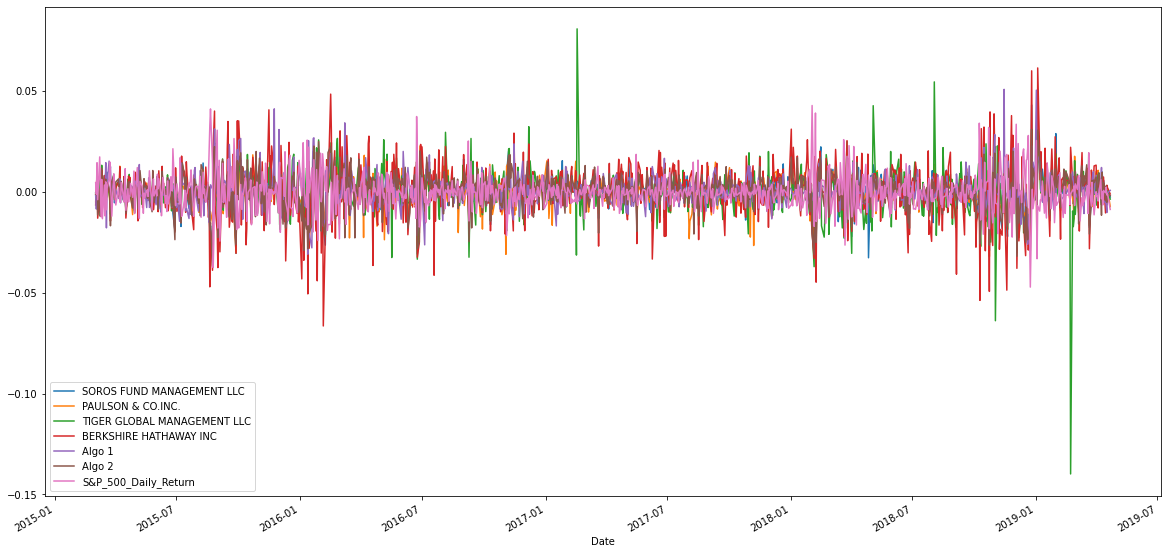

In [806]:
# Daily returns plot for all portfolios
concat_df.plot(kind='line', x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

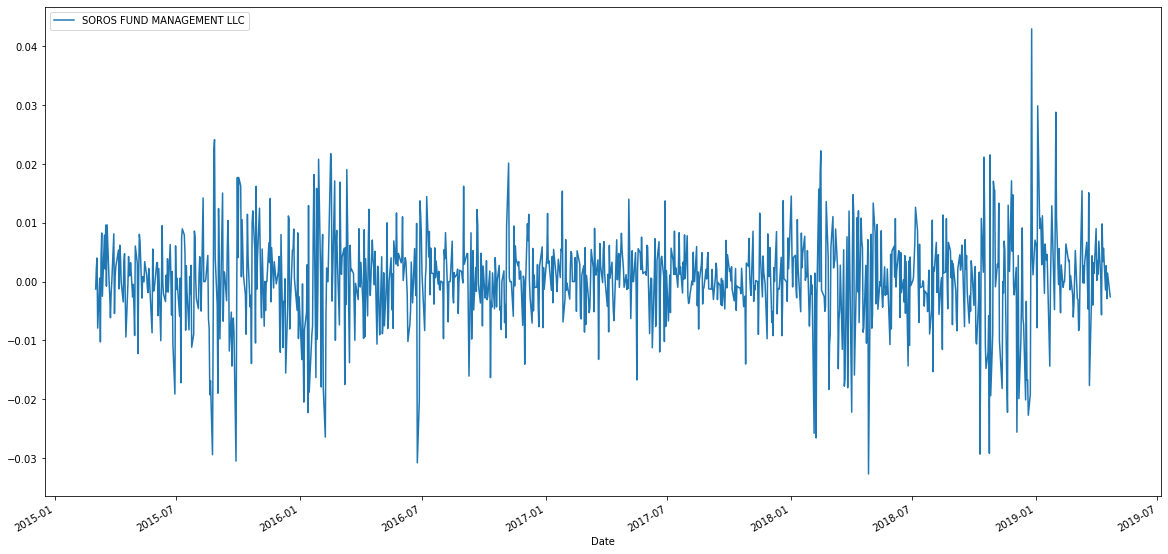

In [807]:
# Daily return plot of the SOROS FUND MANAGEMENT LLC portfolio
concat_df[['SOROS FUND MANAGEMENT LLC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

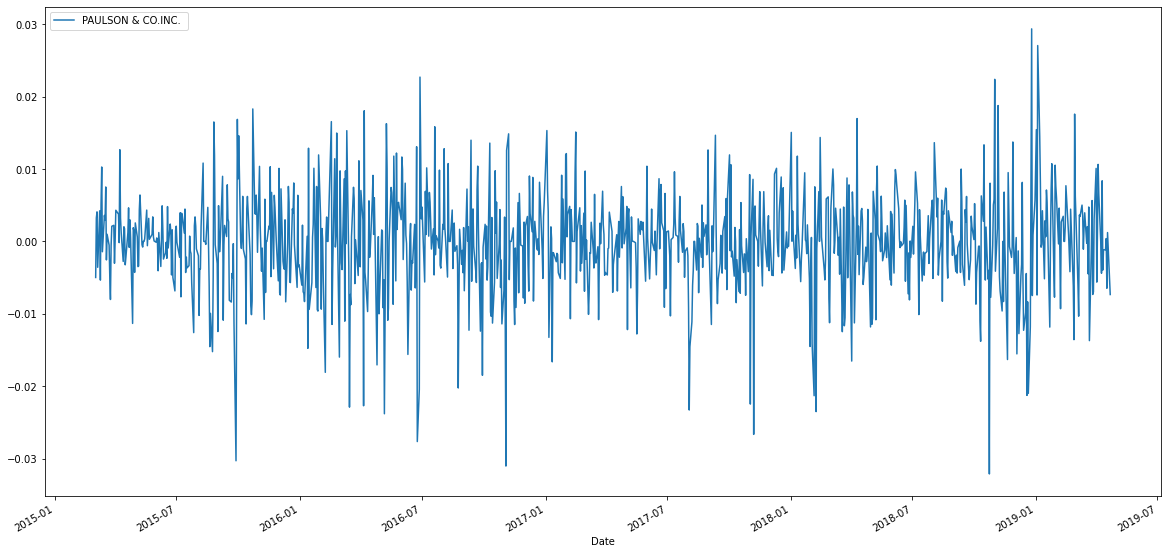

In [808]:
# Daily return plot of the PAULSON & CO.INC. portfolio
concat_df[['PAULSON & CO.INC. ','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

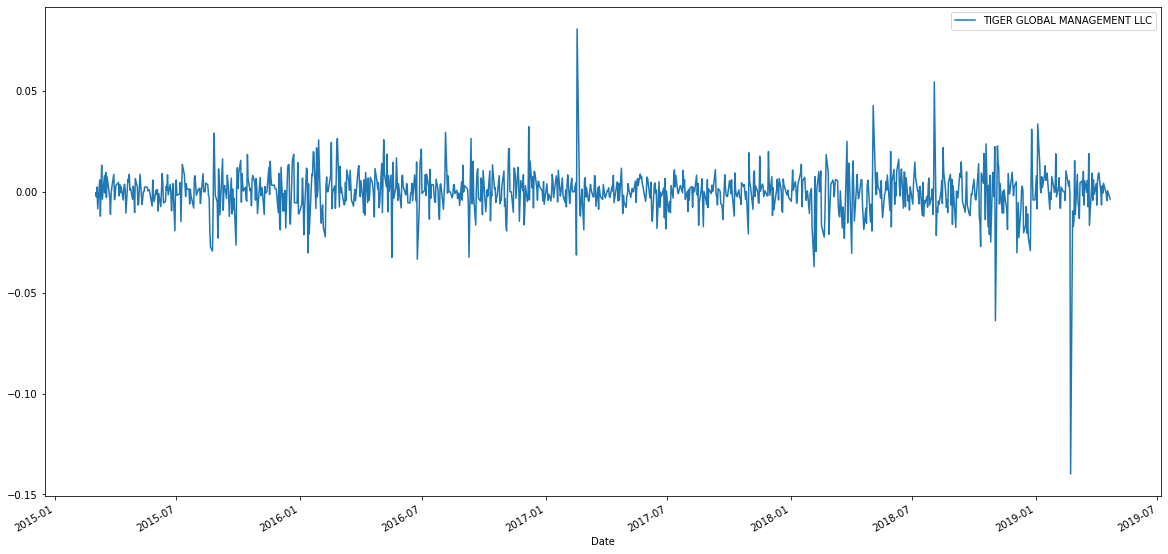

In [809]:
# Daily return plot of the TIGER GLOBAL MANAGEMENT LLC portfolio
concat_df[['TIGER GLOBAL MANAGEMENT LLC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

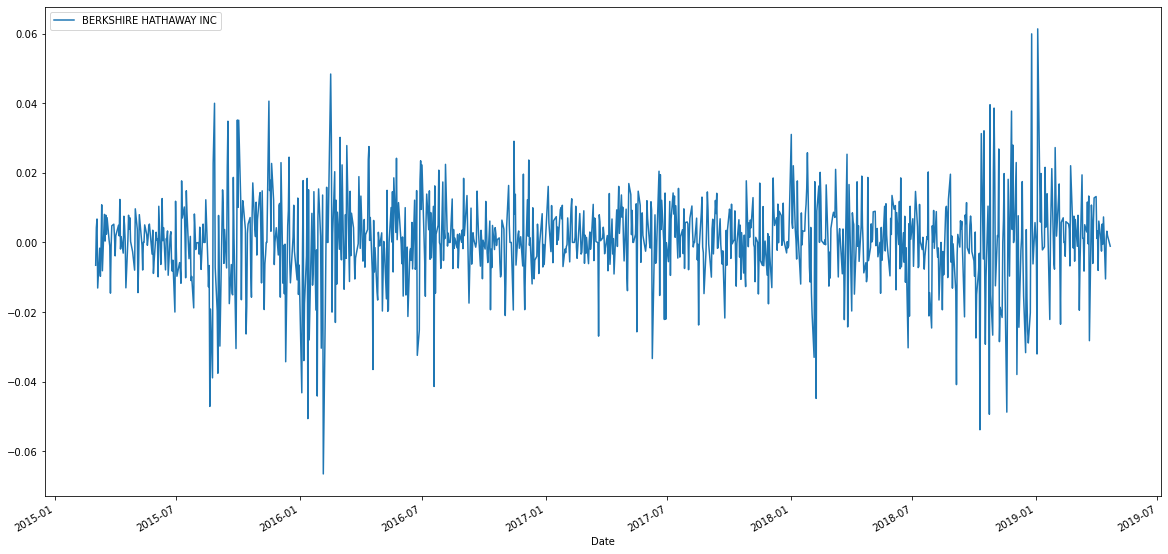

In [810]:
# Daily return plot of the BERKSHIRE HATHAWAY INC portfolio
concat_df[['BERKSHIRE HATHAWAY INC','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

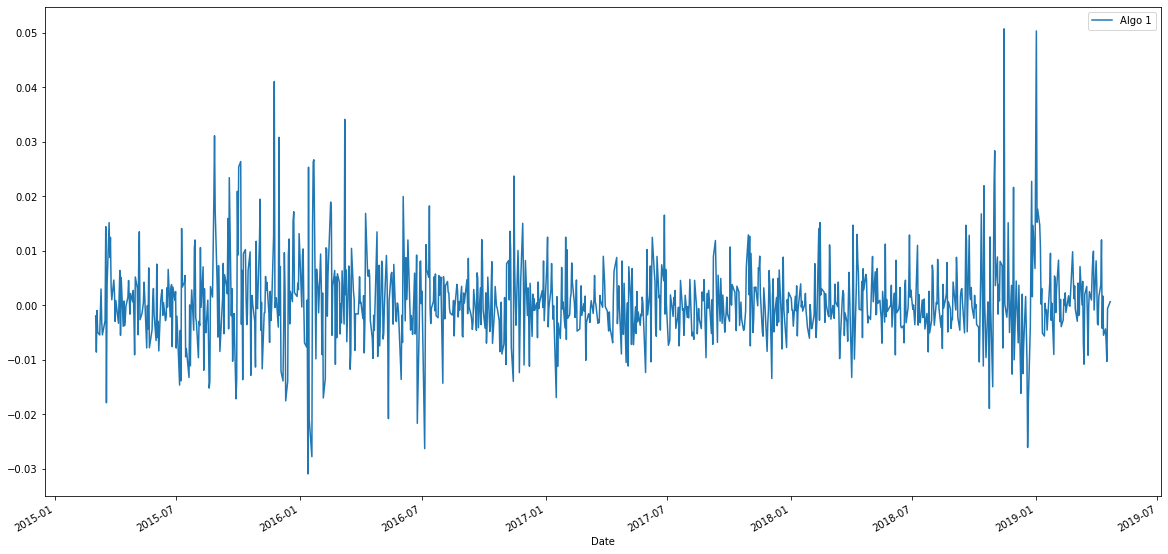

In [811]:
# Daily return plot of the Algo 1 portfolio
concat_df[['Algo 1','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

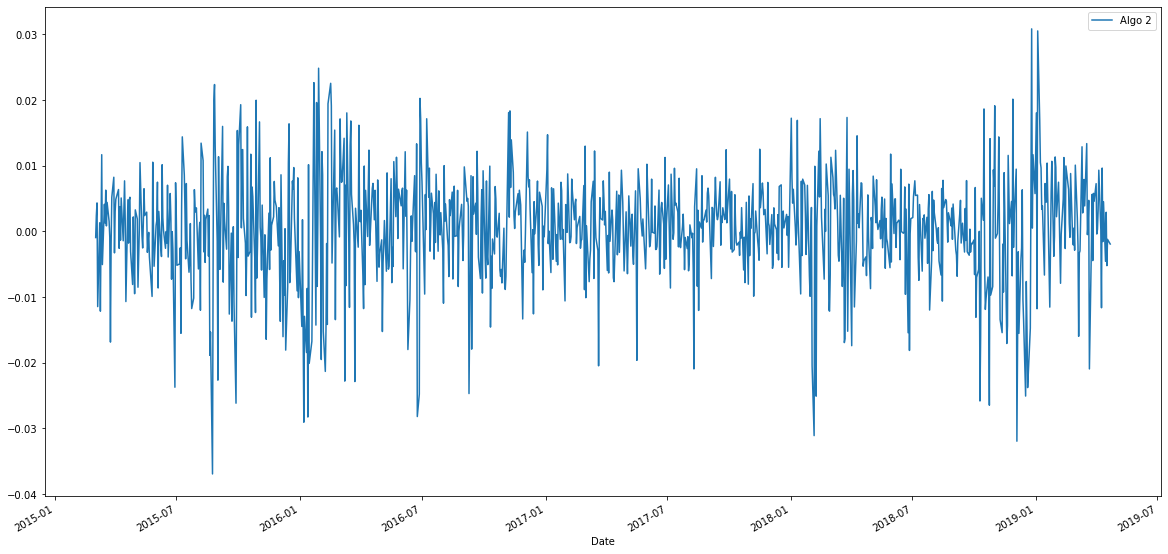

In [812]:
# Daily return plot of the Algo 2 portfolio
concat_df[['Algo 2','Date']].plot(x='Date', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

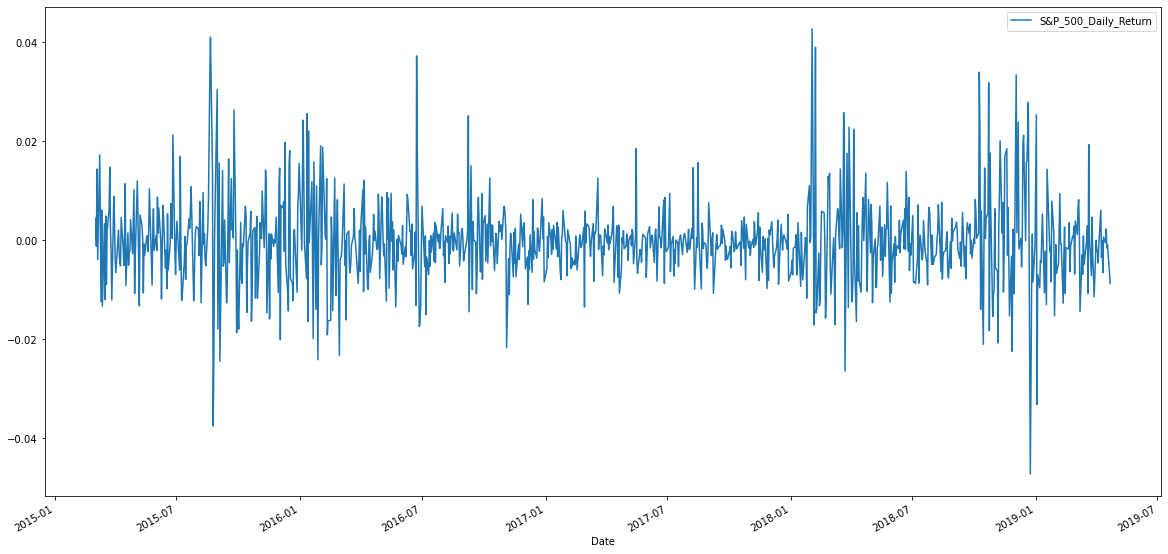

In [813]:
# Daily return plot of the S&P_500 portfolio
concat_df[['S&P_500_Daily_Return','Date']].plot(x='Date', figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [814]:
# Calculate cumulative returns of all portfolios

In [815]:
# SOROS FUND MANAGEMENT LLC portfolio cumulative return
soros_cum_return=()
soros_cum_return=concat_df["SOROS FUND MANAGEMENT LLC"].sum()
soros_cum_return

0.17772326953239803

In [816]:
# PAULSON & CO.INC. LLC portfolio cumulative return
paulson_cum_return=()
paulson_cum_return=concat_df["PAULSON & CO.INC. "].sum()
paulson_cum_return

-0.22662120902335225

In [817]:
# TIGER GLOBAL MANAGEMENT LLC portfolio cumulative return
tiger_cum_return=()
tiger_cum_return=concat_df["TIGER GLOBAL MANAGEMENT LLC"].sum()
tiger_cum_return

-0.09312193396550372

In [818]:
# BERKSHIRE HATHAWAY INC portfolio cumulative return
berkshire_cum_return=()
berkshire_cum_return=concat_df["BERKSHIRE HATHAWAY INC"].sum()
berkshire_cum_return

0.5145084271332625

In [819]:
# Algo 1 portfolio cumulative return
algo1_cum_return=()
algo1_cum_return=concat_df["Algo 1"].sum()
algo1_cum_return

0.68527677123948

In [820]:
# Algo 2 portfolio cumulative return
algo2_cum_return=()
algo2_cum_return=concat_df["Algo 2"].sum()
algo2_cum_return

0.2651813640329055

In [821]:
# S&P 500 portfolio cumulative return
sp500_cum_return=()
sp500_cum_return=concat_df["S&P_500_Daily_Return"].sum()
sp500_cum_return

-0.29229468655047464

In [822]:
# Plot cumulative returns

In [823]:
data = [['Soro', soros_cum_return],['Paulson', paulson_cum_return], ['Tiger', tiger_cum_return], ['Berkshire', berkshire_cum_return], ['Algo1', algo1_cum_return], ['Algo2', algo2_cum_return], ['S&P', sp500_cum_return]]

In [824]:
pcr_df = pd.DataFrame(data, columns = ['Portfolio', 'Return'])
pcr_df

,Portfolio,Return
0,Soro,0.177723
1,Paulson,-0.226621
2,Tiger,-0.093122
3,Berkshire,0.514508
4,Algo1,0.685277
5,Algo2,0.265181
6,S&P,-0.292295


<AxesSubplot:xlabel='Portfolio'>

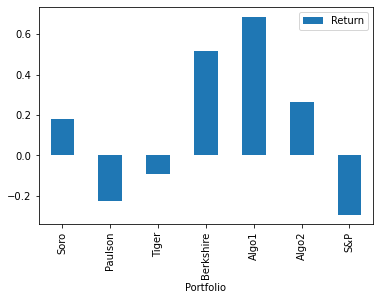

In [825]:
pcr_df.plot(x='Portfolio', kind='bar')

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

In [826]:
# Box plot to visually show risk

<AxesSubplot:>

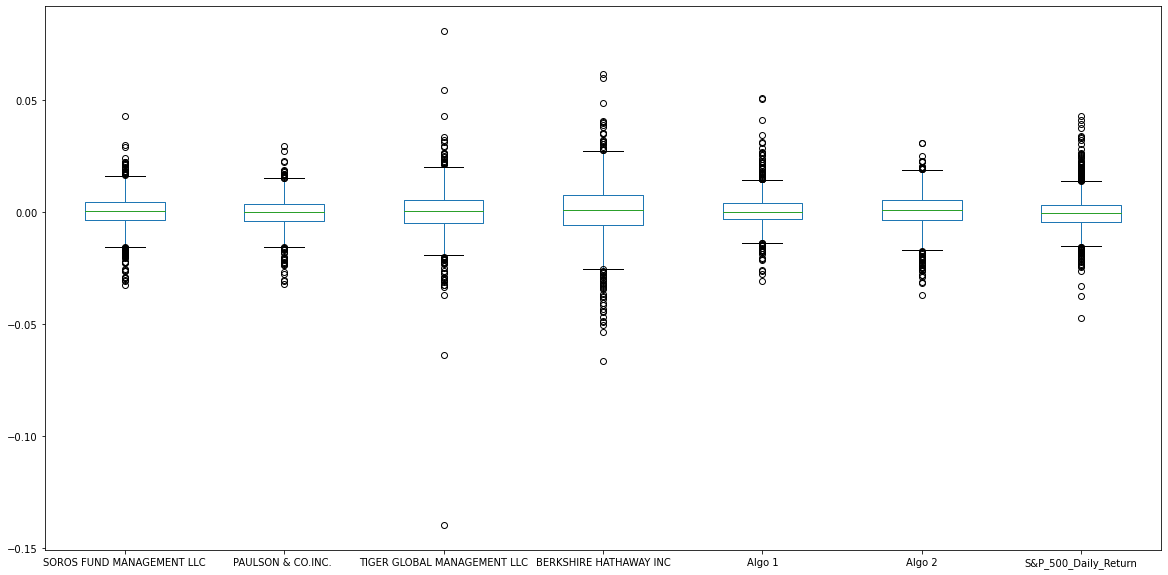

In [827]:
concat_df.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations


In [ ]:
# Calculate the daily standard deviations of all portfolios

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock

In [ ]:
# Combine all stocks in a single DataFrame

In [ ]:
# Reset Date index

In [ ]:
# Reorganize portfolio data by having a column per symbol

In [ ]:
# Calculate daily returns

In [ ]:
# Drop NAs

In [ ]:
# Display sample data

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

In [ ]:
# Plot rolling standard deviation

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot

### How does your portfolio do?

Write your answer here!